In [100]:
# Import libraries
import pandas as pd
import numpy as np
import os
import csv
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
# Creation of dataframes of the different csv files
dataframes = []
for dirname, _, filenames in os.walk('./datasets/1_SEGMENTATION'):
    for filename in filenames:
        file = filename.replace('.csv', '_df')
        filepath = os.path.join(dirname, filename)
        # Sniff the delimiter using csv.Sniffer
        with open(filepath, 'r', newline='') as csvfile:
            sniffer = csv.Sniffer()
            dialect = sniffer.sniff(csvfile.read(4096))  # Read a sample to sniff
            separator = dialect.delimiter
        # Read the CSV file with the detected separator
        df = pd.read_csv(filepath, sep=separator, encoding="UTF-8")
        globals()[file] = df.copy()
        dataframes.append(df)
        print(file,'-','\n','Rows:',df.shape[0],'\n','Columns:',df.shape[1])
print('Data imported')

RETAIL.txt - 
 Rows: 20 
 Columns: 1
RETAIL_PRODUCT_df - 
 Rows: 2800 
 Columns: 3
RETAIL_REGISTRY_df - 
 Rows: 25727 
 Columns: 4


RETAIL_SALES_df - 
 Rows: 489967 
 Columns: 6
RETAIL_SALES_DETAIL_df - 
 Rows: 2047073 
 Columns: 6
RFM_Final_df - 
 Rows: 25727 
 Columns: 24
Data imported


In [102]:
# Assigning the dataframes to the corresponding variables
rp_df = RETAIL_PRODUCT_df
rr_df = RETAIL_REGISTRY_df
rs_df = RETAIL_SALES_df
rsd_df = RETAIL_SALES_DETAIL_df

In [103]:
# Merge the dataframes to create a unique dataframe
df = rsd_df.merge(rs_df, how = 'inner', on = ['CUSTOMER_ID', 'DATE'] )

In [104]:
# Merge the retail sales and retail sales detail to retail product
df = df.merge(rp_df, how = 'inner', on = ['PRODUCT_ID'], )
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN,14,CASH,15:06:37,-3960.0,3,READY-MADE
1,WG00404070,2020-01-21,1068,4.0,27.40,NaN,105,CASH,17:24:16,615.0,3,READY-MADE
2,EB00404430,2020-01-26,1068,1.0,6.95,NaN,14,CASH,09:49:34,-3275.0,3,READY-MADE
3,WD04132126,2019-10-08,1068,1.0,6.85,NaN,14,DEBIT CARD,16:11:57,1130.0,3,READY-MADE
4,DK00406358,2019-06-08,1068,2.0,13.70,NaN,14,CASH,17:38:48,385.0,3,READY-MADE


In [105]:
# Merge df to retail registry
df = df.merge(rr_df, how = 'inner', on = ['CUSTOMER_ID'])

In [106]:
# Fill the missing values with 0 in the special column
df['SPECIAL'] = df['SPECIAL'].fillna(0)

In [107]:
# Replace the values of the column special with 1 if the value is different from 0
df['SPECIAL'].replace({'Y': 1}, inplace = True)
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB


In [108]:
check1 = df.loc[df['SPECIAL'] == '1']
check1.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN


In [109]:
# Descibe the dataframe
df.describe()

,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,TOTAL_POINTS,CATEGORY_ID,REGIONAL_CODE
count,2.047962e+06,2.047962e+06,2.026404e+06,2.047962e+06,2.047962e+06,1.994093e+06,2.047962e+06,2.047962e+06
mean,7.404719e+04,1.136169e+00,8.106861e+00,1.851109e-03,4.941574e+01,8.663137e+01,6.030331e+00,3.145012e+01
std,7.769339e+04,1.714687e+00,5.661384e+00,4.298468e-02,3.592643e+01,1.644398e+03,3.981517e+00,1.970878e+01
min,3.600000e+01,-4.800000e+01,-3.048000e+02,0.000000e+00,0.000000e+00,-1.469150e+05,0.000000e+00,1.000000e+00
25%,2.942000e+03,1.000000e+00,4.950000e+00,0.000000e+00,1.700000e+01,1.650000e+02,3.000000e+00,1.300000e+01
50%,4.417800e+04,1.000000e+00,6.950000e+00,0.000000e+00,3.800000e+01,2.850000e+02,6.000000e+00,3.000000e+01
75%,1.387970e+05,1.000000e+00,9.950000e+00,0.000000e+00,8.100000e+01,4.400000e+02,1.000000e+01,4.700000e+01
max,2.537530e+05,1.000000e+03,3.704500e+02,1.000000e+00,1.410000e+02,9.180000e+03,1.600000e+01,8.200000e+01


In [110]:
# Descriptive statistics of the dataframe
df.describe(include = 'object')

,CUSTOMER_ID,DATE,PAYMENT_METHOD,TIME,CATEGORY_DESC,CREATION_DATE,ORIGIN
count,2047962,2047962,2047962,2047962,2047962,2046716,2047962
unique,25727,498,5,45232,13,6130,4
top,LT01053024,2019-11-13,CASH,11:34:47,READY-MADE,2003-03-20,WEB
freq,938,6861,1312025,172,559353,2844,1372988


In [111]:
# Find the isnan values in the dataframe
df.isna().sum()

CUSTOMER_ID           0
DATE                  0
PRODUCT_ID            0
QUANTITY              0
LIST_PRICE        21558
SPECIAL               0
OUTLET_ID             0
PAYMENT_METHOD        0
TIME                  0
TOTAL_POINTS      53869
CATEGORY_ID           0
CATEGORY_DESC         0
CREATION_DATE      1246
REGIONAL_CODE         0
ORIGIN                0
dtype: int64

In [112]:
# Fill the TOTAL_POINTS and LIST_PRICE column na values with 0
df['TOTAL_POINTS'] = df['TOTAL_POINTS'].fillna(0)
df['LIST_PRICE'] = df['LIST_PRICE'].fillna(0)

In [113]:
# Convert date to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [114]:
df.isna().sum()

CUSTOMER_ID          0
DATE                 0
PRODUCT_ID           0
QUANTITY             0
LIST_PRICE           0
SPECIAL              0
OUTLET_ID            0
PAYMENT_METHOD       0
TIME                 0
TOTAL_POINTS         0
CATEGORY_ID          0
CATEGORY_DESC        0
CREATION_DATE     1246
REGIONAL_CODE        0
ORIGIN               0
dtype: int64

In [115]:
# Fill the NaN values in CREATION_DATE with the earliest date in the DATE column based on the CUSTOMER_ID
df['CREATION_DATE'] = df['CREATION_DATE'].fillna(df.groupby('CUSTOMER_ID')['DATE'].transform('min'))

In [116]:
# Check the datatypes of the columns
df.dtypes

CUSTOMER_ID               object
DATE              datetime64[ns]
PRODUCT_ID                 int64
QUANTITY                 float64
LIST_PRICE               float64
SPECIAL                    int64
OUTLET_ID                  int64
PAYMENT_METHOD            object
TIME                      object
TOTAL_POINTS             float64
CATEGORY_ID                int64
CATEGORY_DESC             object
CREATION_DATE             object
REGIONAL_CODE              int64
ORIGIN                    object
dtype: object

In [117]:
# Convert CREATION_DATE to datetime
df['CREATION_DATE'] = pd.to_datetime(df['CREATION_DATE'])

In [118]:
# Rename 'CHECK' to 'CHEQUE' in PAYMENT_METHOD column
df['PAYMENT_METHOD'].replace({'CHECK': 'CHEQUE'}, inplace = True)

In [119]:
# Confirm the dtypes
df.dtypes

CUSTOMER_ID               object
DATE              datetime64[ns]
PRODUCT_ID                 int64
QUANTITY                 float64
LIST_PRICE               float64
SPECIAL                    int64
OUTLET_ID                  int64
PAYMENT_METHOD            object
TIME                      object
TOTAL_POINTS             float64
CATEGORY_ID                int64
CATEGORY_DESC             object
CREATION_DATE     datetime64[ns]
REGIONAL_CODE              int64
ORIGIN                    object
dtype: object

In [120]:
# Define the specific date
specific_date = datetime(2020, 1, 26)

# Determination of a customer's longevity based on the difference between the date of the first purchase and the date a custom date
df['LONGEVITY'] = (specific_date - df['CREATION_DATE']).dt.days

# If the customer doesn't have a CREATION_DATE, the LONGEVITY is earliest date per the CUSTOMER_ID
df['LONGEVITY'] = df['LONGEVITY'].fillna(df.groupby('CUSTOMER_ID')['LONGEVITY'].transform(lambda x: x.fillna(x.min())))

In [121]:
# Extract the hour from the LONGEVITY column and convert it to int
def extract_hour(time_str):
    return int(time_str.split(':')[0])

df['TRANSACTION_HOUR'] = df['TIME'].apply(extract_hour)

# Add a column that shows the hour of the transaction as a period in the day (morning, afternoon, evening, night)
def time_of_day(hour):
    if hour >= 6 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 18:
        return 'afternoon'
    elif hour >= 18 and hour < 24:
        return 'evening'
    else:
        return 'night'
    
df['TIME_OF_DAY'] = df['TRANSACTION_HOUR'].apply(time_of_day)

# Add another column that shows the day of the week and weekday
df['WEEKDAY'] = df['DATE'].dt.weekday
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()

# Add another column that shows the month of the year
df['MONTH'] = df['DATE'].dt.month_name()

# Add another column that shows the year
df['YEAR'] = df['DATE'].dt.year

df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,CREATION_DATE,REGIONAL_CODE,ORIGIN,LONGEVITY,TRANSACTION_HOUR,TIME_OF_DAY,WEEKDAY,DAY_OF_WEEK,MONTH,YEAR
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,...,2003-04-02,23,WEB,6143,15,afternoon,4,Friday,January,2020
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,...,2003-04-02,23,WEB,6143,18,evening,4,Friday,November,2018
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,...,2003-04-02,23,WEB,6143,15,afternoon,4,Friday,January,2020
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,...,2003-04-02,23,WEB,6143,18,evening,4,Friday,August,2019
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,...,2003-04-02,23,WEB,6143,14,afternoon,6,Sunday,November,2019


In [122]:
# Convert total points to int
df['TOTAL_POINTS'] = df['TOTAL_POINTS'].astype(int)

# Calculation of the absolute sum of negative values in the column TOTAL_POINTS for each CUSTOMER_ID
df['POINTS_SPENT'] = df['TOTAL_POINTS'].apply(lambda x: abs(x) if x < 0 else 0)

In [123]:
# Creation of dataframe of POINTS_SPENT per CUSTOMER_ID
points_spent_df = df.groupby('CUSTOMER_ID')['POINTS_SPENT'].sum().reset_index()
points_spent_df.head()

,CUSTOMER_ID,POINTS_SPENT
0,AA00312188,8760
1,AA00312390,2240
2,AA00325975,80675
3,AA00336843,24255
4,AA00339761,4030


In [124]:
# Processing of loyalty points
loyalty = points_spent_df.copy()
loyalty['loyalty_score'] = loyalty['POINTS_SPENT'].apply(lambda x: 1 if x > 0 else 0)
loyalty.head()

,CUSTOMER_ID,POINTS_SPENT,loyalty_score
0,AA00312188,8760,1
1,AA00312390,2240,1
2,AA00325975,80675,1
3,AA00336843,24255,1
4,AA00339761,4030,1


In [125]:
# Creation of new column TRANSACTION_TYPE determined by the following conditions
# If the value in the column QUANTITY is less than or equal to 0 or LIST_PRICE is less than 0, the TRANSACTION_TYPE is 'RETURNED' stored as 0
# If the value in the column QUANTITY is greater than 0 and LIST_PRICE is equal to 0, the TRANSACTION_TYPE is 'PROMOTION' stored as 1
# else the TRANSACTION_TYPE is 'PURCHASE' stored as 2
df['TRANSACTION_TYPE'] = np.where((df['QUANTITY'] <= 0) | (df['LIST_PRICE'] < 0), 0, np.where((df['QUANTITY'] > 0) & (df['LIST_PRICE'] == 0), 1, 2))
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,ORIGIN,LONGEVITY,TRANSACTION_HOUR,TIME_OF_DAY,WEEKDAY,DAY_OF_WEEK,MONTH,YEAR,POINTS_SPENT,TRANSACTION_TYPE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,WEB,6143,15,afternoon,4,Friday,January,2020,3960,2
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,WEB,6143,18,evening,4,Friday,November,2018,0,2
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,WEB,6143,15,afternoon,4,Friday,January,2020,3960,2
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,WEB,6143,18,evening,4,Friday,August,2019,0,2
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,WEB,6143,14,afternoon,6,Sunday,November,2019,0,2


In [126]:
# Determination of the transaction value via the absolute values of QUANTITY and LIST_PRICE
df['TRANSACTION_VALUE'] = None

# Iterate over each row
for index, row in df.iterrows():
    if row['TRANSACTION_TYPE'] == 1 or row['TRANSACTION_TYPE'] == 2:
        df.at[index, 'TRANSACTION_VALUE'] = abs(row['LIST_PRICE']) * abs(row['QUANTITY'])
    else:
        df.at[index, 'TRANSACTION_VALUE'] = -(abs(row['LIST_PRICE']) * abs(row['QUANTITY']))

df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,LONGEVITY,TRANSACTION_HOUR,TIME_OF_DAY,WEEKDAY,DAY_OF_WEEK,MONTH,YEAR,POINTS_SPENT,TRANSACTION_TYPE,TRANSACTION_VALUE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,6143,15,afternoon,4,Friday,January,2020,3960,2,6.85
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,6143,18,evening,4,Friday,November,2018,0,2,6.65
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,6143,15,afternoon,4,Friday,January,2020,3960,2,6.25
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,6143,18,evening,4,Friday,August,2019,0,2,6.25
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,6143,14,afternoon,6,Sunday,November,2019,0,2,6.25


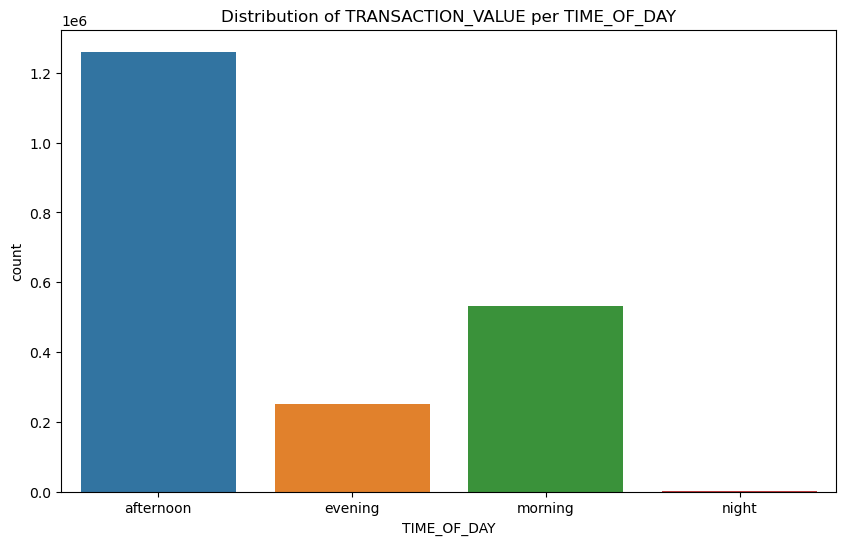

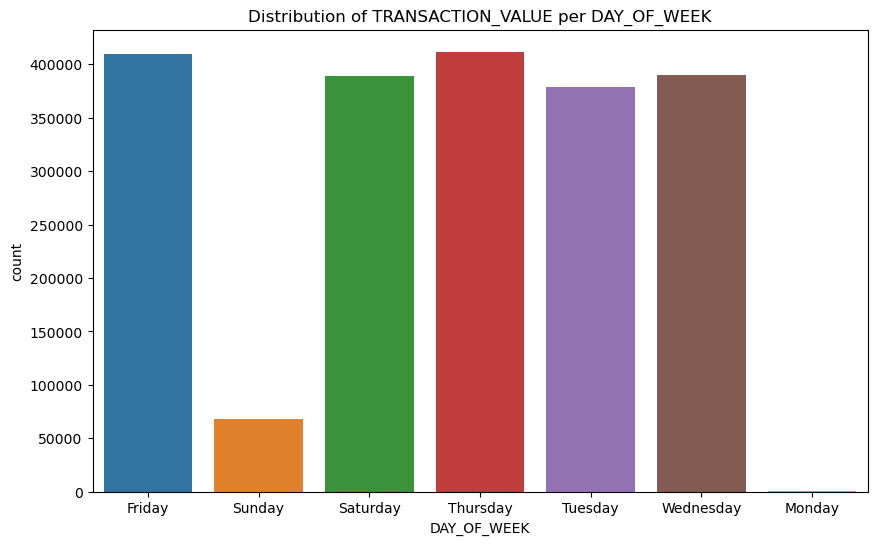

In [127]:
# Plot the distribution of the TRANSACTION_VALUE per TIME_OF_DAY, DAY_OF_WEEK and MONTH
# Plot the distribution of the TRANSACTION_VALUE per TIME_OF_DAY
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIME_OF_DAY')
plt.title('Distribution of TRANSACTION_VALUE per TIME_OF_DAY')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per DAY_OF_WEEK
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DAY_OF_WEEK')
plt.title('Distribution of TRANSACTION_VALUE per DAY_OF_WEEK')
plt.show()


In [128]:
df.columns

Index(['CUSTOMER_ID', 'DATE', 'PRODUCT_ID', 'QUANTITY', 'LIST_PRICE',
       'SPECIAL', 'OUTLET_ID', 'PAYMENT_METHOD', 'TIME', 'TOTAL_POINTS',
       'CATEGORY_ID', 'CATEGORY_DESC', 'CREATION_DATE', 'REGIONAL_CODE',
       'ORIGIN', 'LONGEVITY', 'TRANSACTION_HOUR', 'TIME_OF_DAY', 'WEEKDAY',
       'DAY_OF_WEEK', 'MONTH', 'YEAR', 'POINTS_SPENT', 'TRANSACTION_TYPE',
       'TRANSACTION_VALUE'],
      dtype='object')

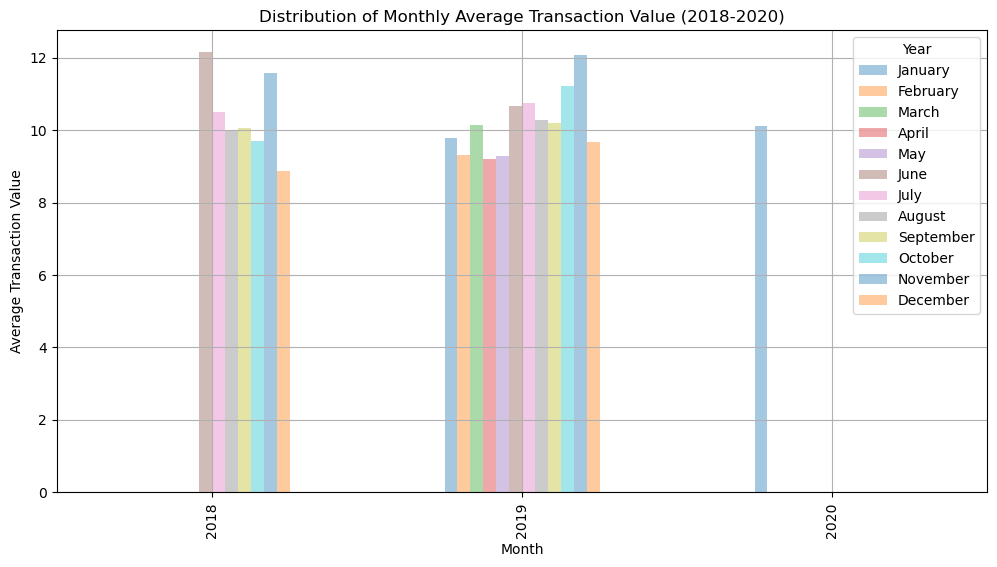

In [129]:
# Monthly transaction value by year
monthly_avg_transaction_value = df.groupby(['YEAR', 'MONTH'])['TRANSACTION_VALUE'].mean().unstack()

# Plot the distribution of transaction value per month for each year
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_transaction_value = monthly_avg_transaction_value.reindex(months, axis=1)
monthly_avg_transaction_value.plot(kind='bar', alpha=0.4, figsize=(12, 6))
plt.title('Distribution of Monthly Average Transaction Value (2018-2020)')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value')
plt.legend(title='Year')
plt.grid(True)
plt.show()

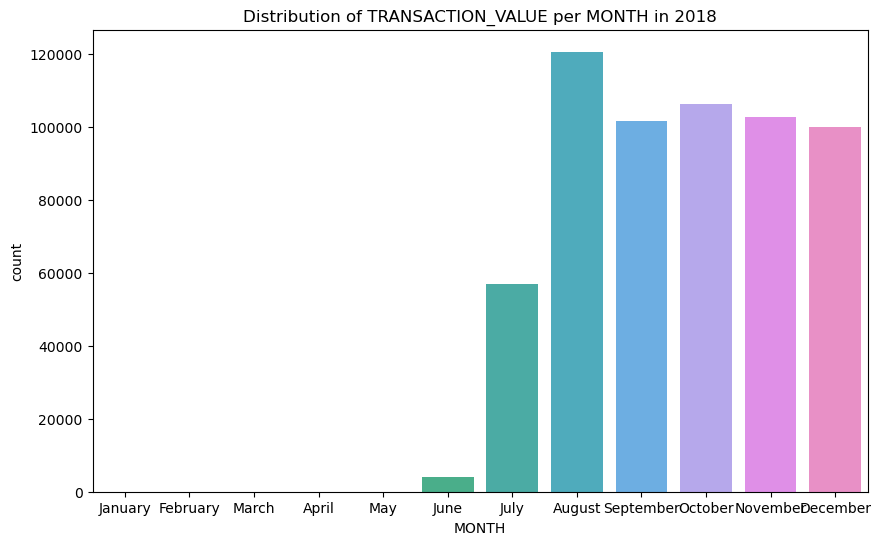

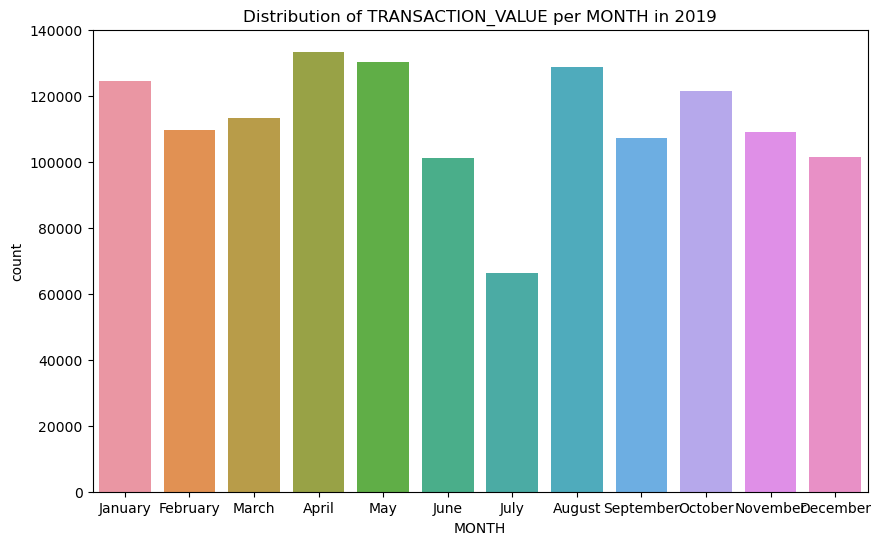

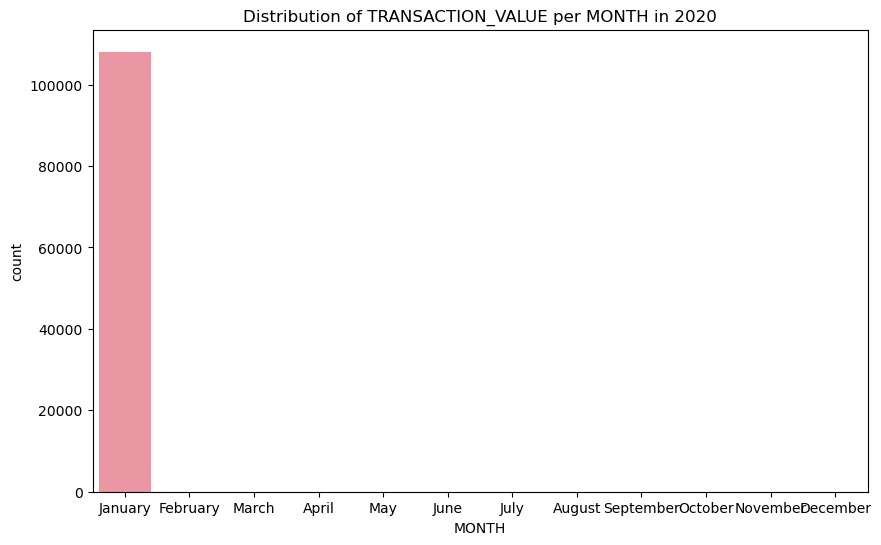

In [130]:
# Plot the distribution of the TRANSACTION_VALUE per MONTH (order months chronologically) for all year 2018, 2019 and 2020 combined
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Plot the distribution of the TRANSACTION_VALUE per MONTH in 2018 (order months chronologically)
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['DATE'].dt.year == 2018], x='MONTH', order=month_order)
plt.title('Distribution of TRANSACTION_VALUE per MONTH in 2018')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per MONTH in 2019 (order months chronologically)
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['DATE'].dt.year == 2019], x='MONTH', order=month_order)
plt.title('Distribution of TRANSACTION_VALUE per MONTH in 2019')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per MONTH in 2020 (order months chronologically)
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['DATE'].dt.year == 2020], x='MONTH', order=month_order)
plt.title('Distribution of TRANSACTION_VALUE per MONTH in 2020')
plt.show()

In [131]:
df.columns

Index(['CUSTOMER_ID', 'DATE', 'PRODUCT_ID', 'QUANTITY', 'LIST_PRICE',
       'SPECIAL', 'OUTLET_ID', 'PAYMENT_METHOD', 'TIME', 'TOTAL_POINTS',
       'CATEGORY_ID', 'CATEGORY_DESC', 'CREATION_DATE', 'REGIONAL_CODE',
       'ORIGIN', 'LONGEVITY', 'TRANSACTION_HOUR', 'TIME_OF_DAY', 'WEEKDAY',
       'DAY_OF_WEEK', 'MONTH', 'YEAR', 'POINTS_SPENT', 'TRANSACTION_TYPE',
       'TRANSACTION_VALUE'],
      dtype='object')

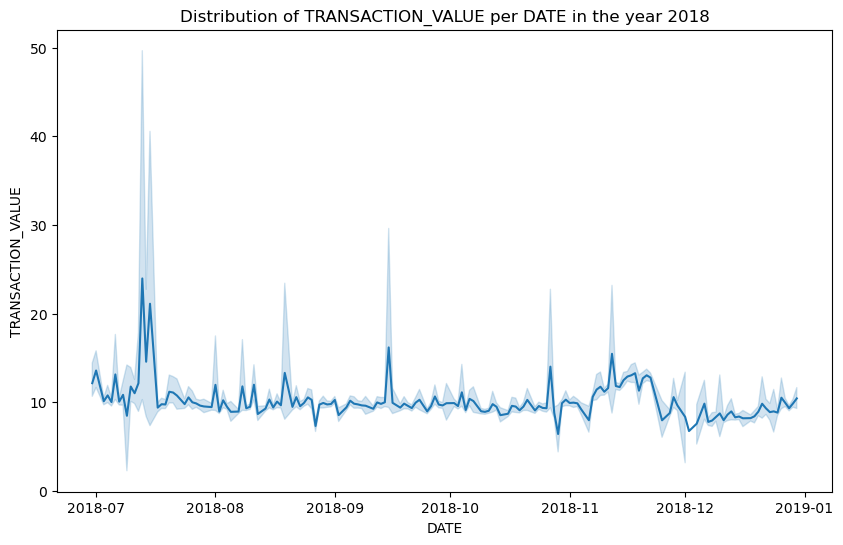

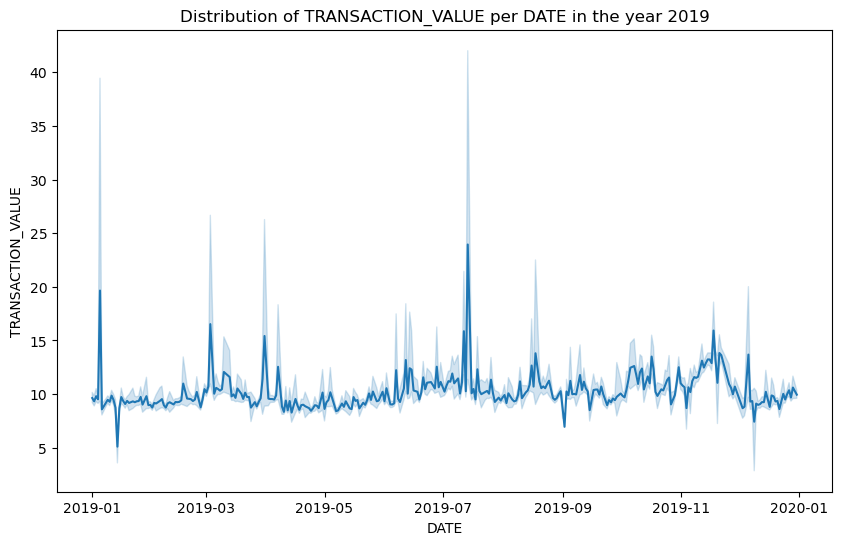

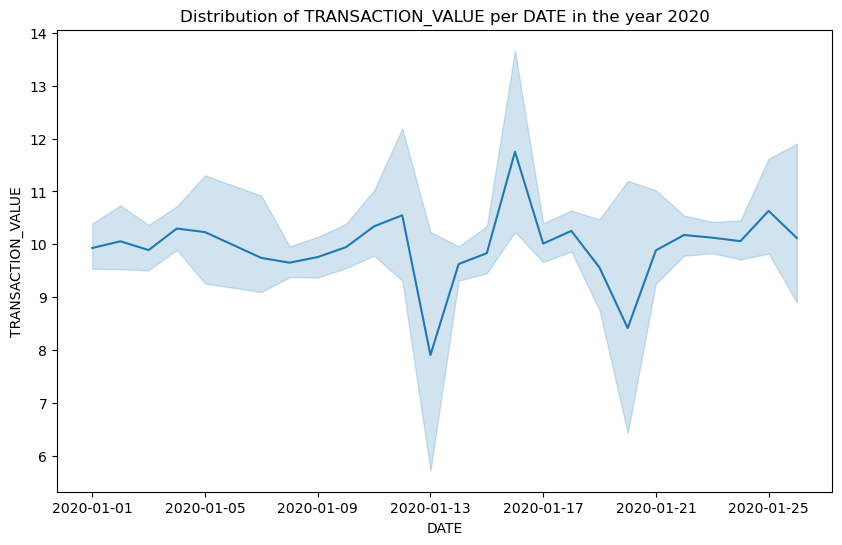

In [132]:
# Line plot of the TRANSACTION_VALUE per DATE in the year 2018, 2019 and 2020
# Plot the distribution of the TRANSACTION_VALUE per DATE in the year 2018
plt.figure(figsize=(10, 6))
df_2018 = df[df['DATE'].dt.year == 2018]
sns.lineplot(data=df_2018, x='DATE', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per DATE in the year 2018')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per DATE in the year 2019
plt.figure(figsize=(10, 6))
df_2019 = df[df['DATE'].dt.year == 2019]
sns.lineplot(data=df_2019, x='DATE', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per DATE in the year 2019')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per DATE in the year 2020
plt.figure(figsize=(10, 6))
df_2020 = df[df['DATE'].dt.year == 2020]
sns.lineplot(data=df_2020, x='DATE', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per DATE in the year 2020')
plt.show()

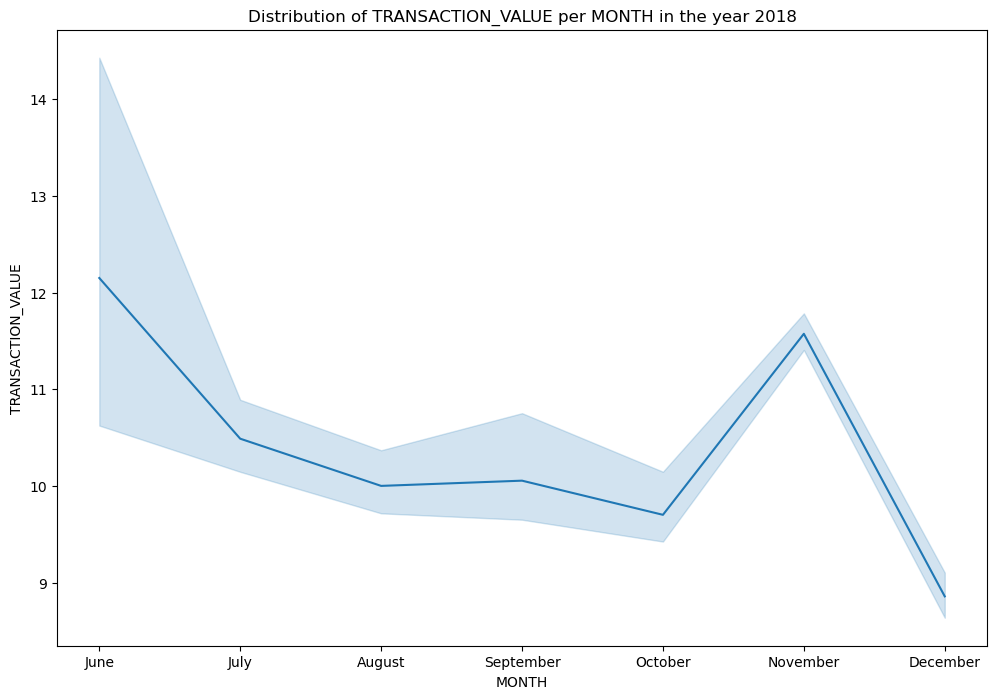

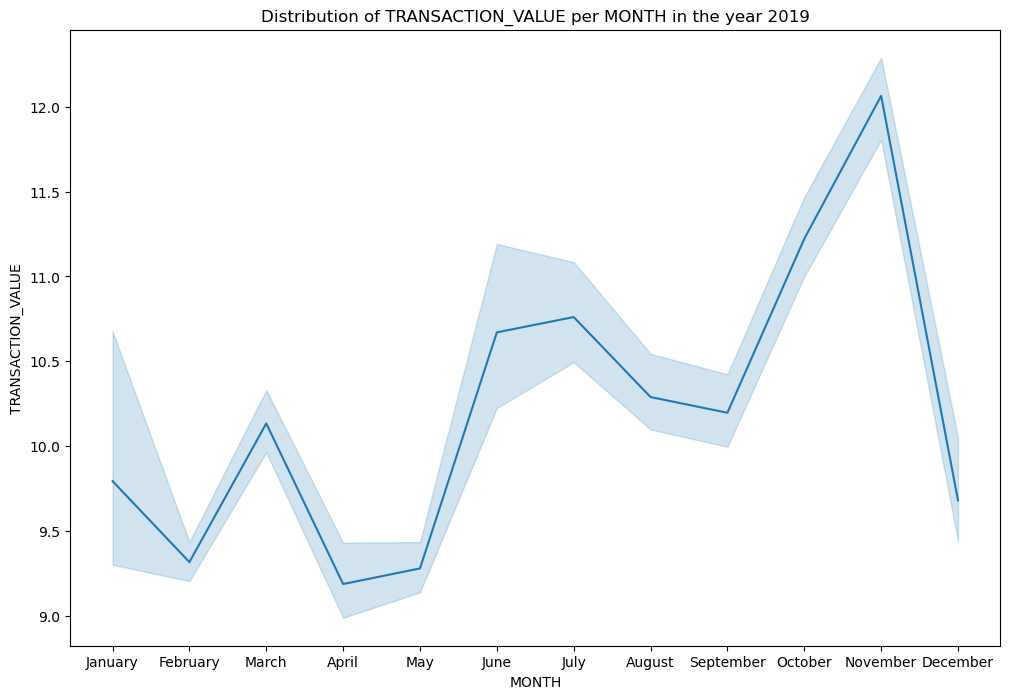

In [133]:
# Plot of the monthly transaction trends
# Sort the months chronologically
df_2018 = df[df['DATE'].dt.year == 2018]
df_2018['MONTH'] = df_2018['DATE'].dt.month_name()
df_2018['MONTH'] = pd.Categorical(df_2018['MONTH'], month_order)
df_2018 = df_2018.sort_values('MONTH')

df_2019 = df[df['DATE'].dt.year == 2019]
df_2019['MONTH'] = df_2019['DATE'].dt.month_name()
df_2019['MONTH'] = pd.Categorical(df_2019['MONTH'], month_order)
df_2019 = df_2019.sort_values('MONTH')

# Plot the distribution of the TRANSACTION_VALUE per MONTH in the year 2018 (order months chronologically)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_2018, x='MONTH', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per MONTH in the year 2018')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per MONTH in the year 2019 (order months chronologically)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_2019, x='MONTH', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per MONTH in the year 2019')
plt.show()


In [134]:
df.columns

Index(['CUSTOMER_ID', 'DATE', 'PRODUCT_ID', 'QUANTITY', 'LIST_PRICE',
       'SPECIAL', 'OUTLET_ID', 'PAYMENT_METHOD', 'TIME', 'TOTAL_POINTS',
       'CATEGORY_ID', 'CATEGORY_DESC', 'CREATION_DATE', 'REGIONAL_CODE',
       'ORIGIN', 'LONGEVITY', 'TRANSACTION_HOUR', 'TIME_OF_DAY', 'WEEKDAY',
       'DAY_OF_WEEK', 'MONTH', 'YEAR', 'POINTS_SPENT', 'TRANSACTION_TYPE',
       'TRANSACTION_VALUE'],
      dtype='object')

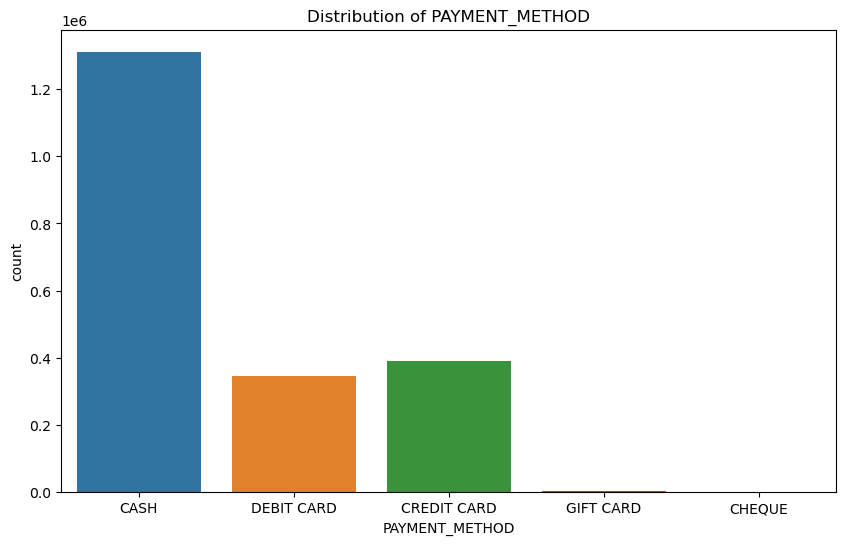

In [135]:
# Plot the distribution of the PAYMENT_METHOD
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PAYMENT_METHOD')
plt.title('Distribution of PAYMENT_METHOD')
plt.show()

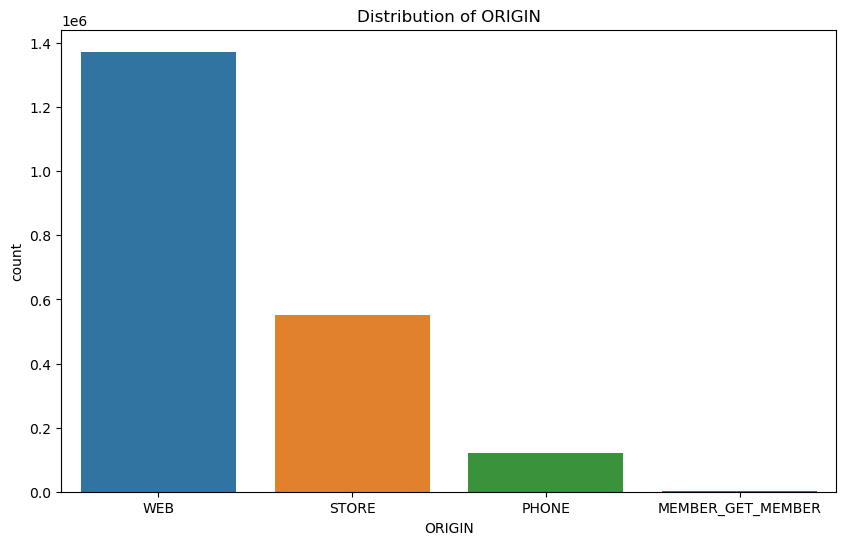

In [136]:
# Plot the distribution of the ORIGIN column as a histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ORIGIN')
plt.title('Distribution of ORIGIN')
plt.show()

In [137]:
df.shape

(2047962, 25)

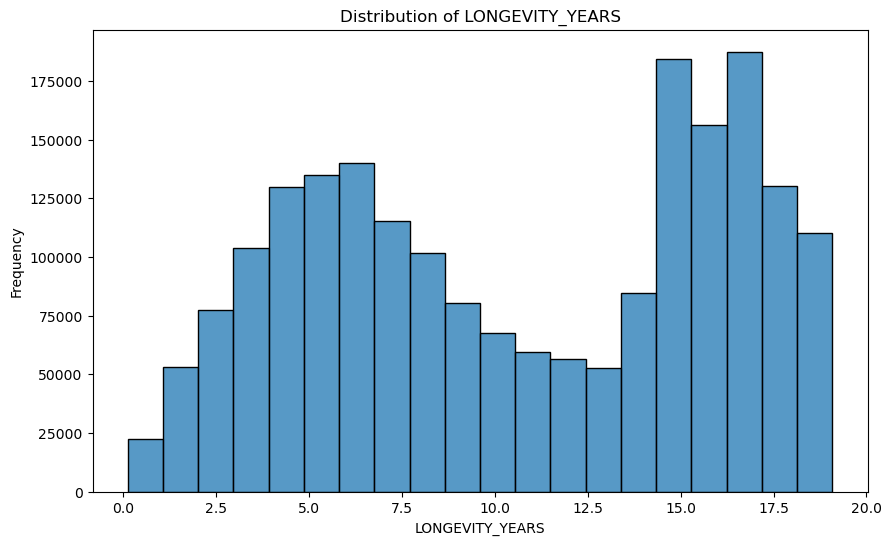

In [138]:
# Plot Customer LONGEVITY (in years) as a histogram
plt.figure(figsize=(10, 6))

# Calculate the LONGEVITY in years
df['LONGEVITY_YEARS'] = df['LONGEVITY'] / 365

sns.histplot(data=df, x='LONGEVITY_YEARS', bins=20)
plt.title('Distribution of LONGEVITY_YEARS')

# Label the axes
plt.xlabel('LONGEVITY_YEARS')
plt.ylabel('Frequency')
plt.show()

In [139]:
df.columns

Index(['CUSTOMER_ID', 'DATE', 'PRODUCT_ID', 'QUANTITY', 'LIST_PRICE',
       'SPECIAL', 'OUTLET_ID', 'PAYMENT_METHOD', 'TIME', 'TOTAL_POINTS',
       'CATEGORY_ID', 'CATEGORY_DESC', 'CREATION_DATE', 'REGIONAL_CODE',
       'ORIGIN', 'LONGEVITY', 'TRANSACTION_HOUR', 'TIME_OF_DAY', 'WEEKDAY',
       'DAY_OF_WEEK', 'MONTH', 'YEAR', 'POINTS_SPENT', 'TRANSACTION_TYPE',
       'TRANSACTION_VALUE', 'LONGEVITY_YEARS'],
      dtype='object')

In [140]:
# Determination of the customer's spending power
total_transaction_value_df = df.groupby('CUSTOMER_ID')['TRANSACTION_VALUE'].sum()
total_transaction_value_df.head()

CUSTOMER_ID
AA00312188    1040.45
AA00312390     687.95
AA00325975     1386.3
AA00336843      498.1
AA00339761      574.8
Name: TRANSACTION_VALUE, dtype: object

In [141]:
# Determination of day of the week with the highest transaction value order by the day of the week
day_of_week_transaction_value_df = df.groupby('DAY_OF_WEEK')['TRANSACTION_VALUE'].sum()
day_of_week_transaction_value_df.head()

DAY_OF_WEEK
Friday      4216975.830012
Monday             9231.35
Saturday    4040033.280011
Sunday           735405.29
Thursday    4155274.290012
Name: TRANSACTION_VALUE, dtype: object

In [142]:
# Determination of the hour of the day with the highest transaction value
hour_of_day_transaction_value_df = df.groupby('TRANSACTION_HOUR')['TRANSACTION_VALUE'].sum()
hour_of_day_transaction_value_df.head()

TRANSACTION_HOUR
0    6136.16
1      432.0
2    2097.75
3    2528.65
4    3081.05
Name: TRANSACTION_VALUE, dtype: object

In [143]:
# Creation of new ORIGIN_ column that labels the ORIGIN column as MEMBER_GET_MEMBER - 0, PHONE - 1, STORE - 2, WEB - 3\
df['ORIGIN_'] = df['ORIGIN'].replace({'MEMBER_GET_MEMBER': 0, 'PHONE': 1, 'STORE': 2, 'WEB': 3})

In [144]:
# Determine the ORIGIN_ with the highest transaction value
origin_transaction_value_df = df.groupby('ORIGIN_')['TRANSACTION_VALUE'].sum()
origin_transaction_value_df.head()

ORIGIN_
0           11176.25
1     1031263.659999
2     5622185.940027
3    14115450.099886
Name: TRANSACTION_VALUE, dtype: object

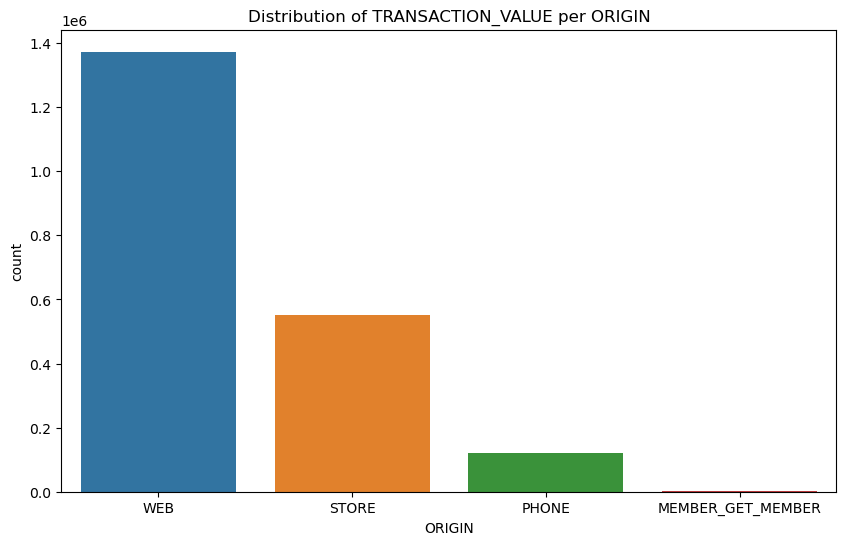

In [145]:
# Show the distribution of the TRANSACTION_VALUE per ORIGIN column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ORIGIN')
plt.title('Distribution of TRANSACTION_VALUE per ORIGIN')
plt.show()

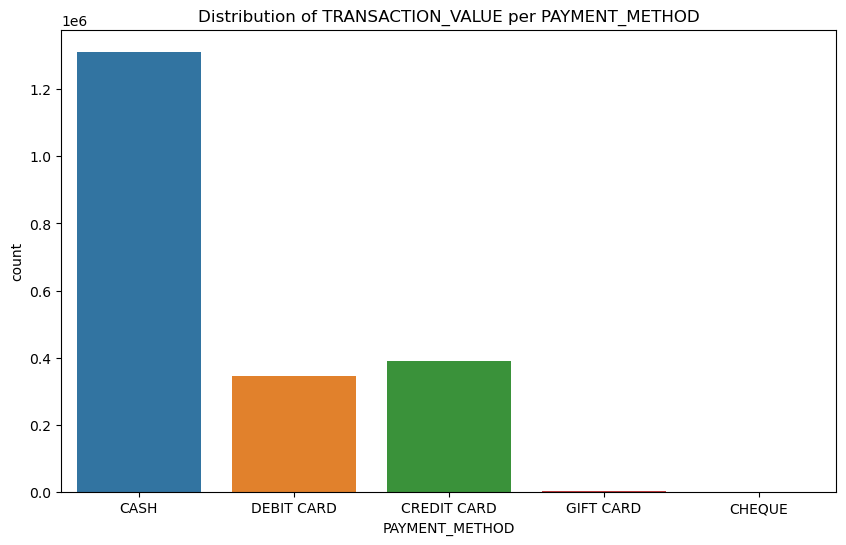

In [146]:
# Create PAYMENT_METHOD_ column that labels the PAYMENT_METHOD column as 'CASH': 0, 'CHEQUE': 1, 'CREDIT CARD': 2, 'DEBIT CARD': 3, 'GIFT CARD': 4
df['PAYMENT_METHOD_'] = df['PAYMENT_METHOD'].replace({'CASH': 0, 'CHEQUE': 1, 'CREDIT CARD': 2, 'DEBIT CARD': 3, 'GIFT CARD': 4})

# Determine the PAYMENT_METHOD_ with the highest transaction value
payment_method_transaction_value_df = df.groupby('PAYMENT_METHOD_')['TRANSACTION_VALUE'].sum()

# Show the distribution of the TRANSACTION_VALUE per PAYMENT_METHOD column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PAYMENT_METHOD')
plt.title('Distribution of TRANSACTION_VALUE per PAYMENT_METHOD')
plt.show()

In [147]:
# Determine the region with the highest transaction value
region_transaction_value_df = df.groupby('REGIONAL_CODE')['TRANSACTION_VALUE'].sum()
region_transaction_value_df.head()

REGIONAL_CODE
1    636289.94
2     53381.34
3     809272.7
4    300882.03
5    118778.93
Name: TRANSACTION_VALUE, dtype: object

In [148]:
# Determining Frequency
# Creation of BillNo column
df['BILL_NO'] = range(1, len(df) + 1)

# Creation of freq column subsetted by BILL_NO and dropping duplicates
freq= df.drop_duplicates(subset="BILL_NO").groupby(["CUSTOMER_ID"])[["BILL_NO"]].count()

freq.head()

,BILL_NO
CUSTOMER_ID,
AA00312188,102
AA00312390,58
AA00325975,205
AA00336843,69
AA00339761,59


In [149]:
# Determining Recency
df['RECENCY'] = pd.to_datetime(df['DATE'])
missing_dates = df[df['DATE'].isnull()]
recency = df.groupby(['CUSTOMER_ID']).agg({'RECENCY': lambda x:((specific_date-x.max()).days)})
recency.head()

,RECENCY
CUSTOMER_ID,
AA00312188,24
AA00312390,1
AA00325975,1
AA00336843,14
AA00339761,23


In [150]:
# Creation of region_, outlet, and category dataframes
# Region_
region_ = df.groupby('CUSTOMER_ID')['REGIONAL_CODE'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
region_.columns = ['CUSTOMER_ID', 'MODE_REGIONAL_CODE']

# Outlet
outlet = df.groupby('CUSTOMER_ID')['OUTLET_ID'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
outlet.columns = ['CUSTOMER_ID', 'OUTLET_ID']

# Category
category = df.groupby('CUSTOMER_ID')['CATEGORY_ID'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
category.columns = ['CUSTOMER_ID', 'CATEGORY_ID']


In [151]:
# Calculate the percentage of SPECIAL column for each customer_id
percentage_special = df.groupby('CUSTOMER_ID')['SPECIAL'].mean() * 100

# Round the values to 7 digits after the decimal point
percentage_special = percentage_special.round(2)

# Create a new table with customer_id and percentage_special columns
percentage_special_table = pd.DataFrame({'CUSTOMER_ID': percentage_special.index, 'Percentage_SPECIAL': percentage_special.values})


# add a new column to percentage_special table where the value is 1 if that customer ever bought a special product, and 0 otherwise
percentage_special_table['SPECIAL'] = percentage_special_table['Percentage_SPECIAL'].apply(lambda x: 1 if x > 0 else 0)

#show rows for percentage_special_table where the percentage_special is greater than 0
percentage_special_table[percentage_special_table['Percentage_SPECIAL']>0].head()


,CUSTOMER_ID,Percentage_SPECIAL,SPECIAL
12,AA00405977,0.89,1
30,AA01398403,0.51,1
32,AA01489475,0.70,1
33,AA01748903,1.03,1
35,AA02912403,0.42,1


In [152]:
# Mean of the SPECIAL column for each customer_id
mean_special = df.groupby('CUSTOMER_ID')['SPECIAL'].mean()
mean_special = mean_special.astype(int)
mean_special_table = pd.DataFrame({'CUSTOMER_ID': mean_special.index, 'Mean_SPECIAL': mean_special.values})

mean_special_table.head()

,CUSTOMER_ID,Mean_SPECIAL
0,AA00312188,0
1,AA00312390,0
2,AA00325975,0
3,AA00336843,0
4,AA00339761,0


In [153]:
df.columns

Index(['CUSTOMER_ID', 'DATE', 'PRODUCT_ID', 'QUANTITY', 'LIST_PRICE',
       'SPECIAL', 'OUTLET_ID', 'PAYMENT_METHOD', 'TIME', 'TOTAL_POINTS',
       'CATEGORY_ID', 'CATEGORY_DESC', 'CREATION_DATE', 'REGIONAL_CODE',
       'ORIGIN', 'LONGEVITY', 'TRANSACTION_HOUR', 'TIME_OF_DAY', 'WEEKDAY',
       'DAY_OF_WEEK', 'MONTH', 'YEAR', 'POINTS_SPENT', 'TRANSACTION_TYPE',
       'TRANSACTION_VALUE', 'LONGEVITY_YEARS', 'ORIGIN_', 'PAYMENT_METHOD_',
       'BILL_NO', 'RECENCY'],
      dtype='object')

In [154]:
origin_mode = df.groupby('CUSTOMER_ID')['ORIGIN_'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
origin_mode.columns = ['CUSTOMER_ID', 'MODE_ORIGIN']

payment_mode = df.groupby('CUSTOMER_ID')['PAYMENT_METHOD_'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
payment_mode.columns = ['CUSTOMER_ID', 'MODE_PAYMENT_METHOD']

transaction_mode = df.groupby('CUSTOMER_ID')['TRANSACTION_HOUR'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
transaction_mode.columns = ['CUSTOMER_ID', 'MODE_TRANSACTION_HOUR']

weekday_mode = df.groupby('CUSTOMER_ID')['WEEKDAY'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
weekday_mode.columns = ['CUSTOMER_ID', 'MODE_WEEKDAY']

customer_year = df.groupby('CUSTOMER_ID')['LONGEVITY'].first().reset_index()


In [155]:
total_transaction_value_df

CUSTOMER_ID
AA00312188    1040.45
AA00312390     687.95
AA00325975     1386.3
AA00336843      498.1
AA00339761      574.8
               ...   
YZ04556116      39.25
YZ04586406     1814.7
YZ04658257     1029.3
YZ04743693      81.45
YZ04933987     274.75
Name: TRANSACTION_VALUE, Length: 25727, dtype: object

In [156]:
# RFM Analysis
RFM = pd.concat([recency, freq, total_transaction_value_df], axis=1)

In [157]:
RFM.rename(columns={'RECENCY': 'Recency'}, inplace=True)
RFM.rename(columns={'BILL_NO': 'Frequency'}, inplace=True)
RFM.rename(columns={'TRANSACTION_VALUE': 'Monetary'}, inplace=True)

In [158]:
RFM.head()

,Recency,Frequency,Monetary
CUSTOMER_ID,,,
AA00312188,24,102,1040.45
AA00312390,1,58,687.95
AA00325975,1,205,1386.3
AA00336843,14,69,498.1
AA00339761,23,59,574.8


In [159]:
# Merge loyalty points, region_, outlet, category, percentage_special_table, mean_special_table, origin_mode, payment_mode, transaction_mode, weekday_mode, and customer_year
RFM = RFM.merge(loyalty, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(region_, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(outlet, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(category, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(percentage_special_table, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(mean_special_table, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(origin_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(payment_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(transaction_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(weekday_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(customer_year, how='inner', on='CUSTOMER_ID')


In [160]:
RFM.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,SPECIAL,Mean_SPECIAL,MODE_ORIGIN,MODE_PAYMENT_METHOD,MODE_TRANSACTION_HOUR,MODE_WEEKDAY,LONGEVITY
0,AA00312188,24,102,1040.45,8760,1,11,64,10,0.0,0,0,3,0,14,3,5195
1,AA00312390,1,58,687.95,2240,1,42,91,3,0.0,0,0,3,0,16,5,4026
2,AA00325975,1,205,1386.3,80675,1,11,7,1,0.0,0,0,3,3,11,5,5500
3,AA00336843,14,69,498.1,24255,1,11,6,3,0.0,0,0,3,0,13,3,2146
4,AA00339761,23,59,574.8,4030,1,6,7,10,0.0,0,0,3,0,17,4,5826


In [161]:
RFM_ = RFM.copy()
RFM_ = RFM_.drop(['POINTS_SPENT',
       'loyalty_score', 'MODE_REGIONAL_CODE', 'OUTLET_ID', 'CATEGORY_ID',
       'Percentage_SPECIAL', 'SPECIAL', 'Mean_SPECIAL', 'MODE_ORIGIN',
       'MODE_PAYMENT_METHOD', 'MODE_TRANSACTION_HOUR', 'MODE_WEEKDAY',
       'LONGEVITY'], axis=1)

In [162]:
RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary
0,AA00312188,24,102,1040.45
1,AA00312390,1,58,687.95
2,AA00325975,1,205,1386.3
3,AA00336843,14,69,498.1
4,AA00339761,23,59,574.8


In [163]:
# Obtain the quantiles of the RFM values for only the Recency, Frequency, and Monetary columns
# Subset only the Recency, Frequency, and Monetary columns
RFM_ = RFM_[['Recency', 'Frequency', 'Monetary']]
RFM_.head()

# Calculate the quantiles
quantiles = RFM_.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

# Add the CUSTOMER_ID to the RFM_
RFM_ = RFM[['CUSTOMER_ID', 'Recency', 'Frequency', 'Monetary']]
RFM_.head()


,CUSTOMER_ID,Recency,Frequency,Monetary
0,AA00312188,24,102,1040.45
1,AA00312390,1,58,687.95
2,AA00325975,1,205,1386.3
3,AA00336843,14,69,498.1
4,AA00339761,23,59,574.8


In [164]:
# Create a function that assigns a score of 1 to 4 to the recency, frequency, and monetary columns
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
# Assign the scores to the recency, frequency, and monetary columns
RFM_['R_quartile'] = RFM_['Recency'].apply(RScore, args=('Recency',quantiles,))
RFM_['F_quartile'] = RFM_['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
RFM_['M_quartile'] = RFM_['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,AA00312188,24,102,1040.45,2,3,4
1,AA00312390,1,58,687.95,4,2,3
2,AA00325975,1,205,1386.3,4,4,4
3,AA00336843,14,69,498.1,2,3,2
4,AA00339761,23,59,574.8,2,2,3


In [165]:
RFM_['RFM_Segment'] = RFM_.R_quartile.map(str)+RFM_.F_quartile.map(str)+RFM_.M_quartile.map(str)
RFM_['RFM_Score'] = RFM_[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [166]:
RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,AA00312188,24,102,1040.45,2,3,4,234,9
1,AA00312390,1,58,687.95,4,2,3,423,9
2,AA00325975,1,205,1386.3,4,4,4,444,12
3,AA00336843,14,69,498.1,2,3,2,232,7
4,AA00339761,23,59,574.8,2,2,3,223,7


In [167]:
# Check the unique value of the RFM_Segment
RFM_['RFM_Segment'].unique()

array(['234', '423', '444', '232', '223', '333', '224', '133', '334',
       '222', '122', '323', '111', '433', '344', '422', '211', '434',
       '322', '311', '411', '244', '112', '233', '243', '432', '421',
       '321', '332', '132', '123', '212', '121', '424', '443', '343',
       '221', '134', '144', '414', '412', '413', '113', '312', '124',
       '114', '213', '241', '143', '242', '324', '314', '313', '214',
       '342'], dtype=object)

In [168]:
# Readable RFM labels
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}
# RFM_['Segment'] = RFM_['R_quartile'].map(str) + RFM_['F_quartile'].map(str)+ RFM_['M_quartile'].map(str)
RFM_['Segment'] = RFM_['R_quartile'].map(str) + RFM_['F_quartile'].map(str)
RFM_['Segment'] = RFM_['Segment'].replace(segt_map, regex=True)
# Create some human friendly labels for the scores
RFM_['Score_Card'] = 'Green'
RFM_.loc[RFM_['RFM_Score']>5,'Score_Card'] = 'Bronze' 
RFM_.loc[RFM_['RFM_Score']>7,'Score_Card'] = 'Silver' 
RFM_.loc[RFM_['RFM_Score']>9,'Score_Card'] = 'Gold' 
RFM_.loc[RFM_['RFM_Score']>10,'Score_Card'] = 'Platinum'

RFM Label Chart
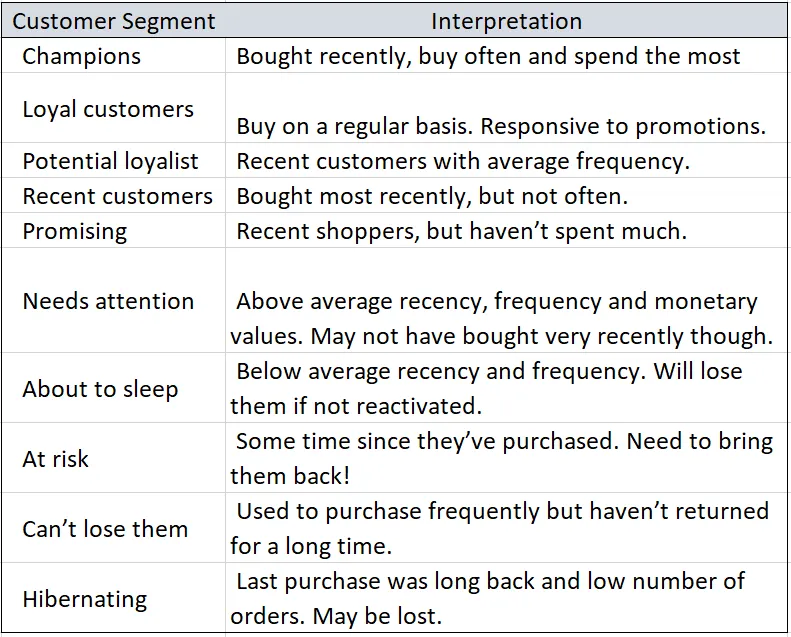

In [169]:
# Review the RFM_ dataframe
RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Segment,Score_Card
0,AA00312188,24,102,1040.45,2,3,4,234,9,At risk,Silver
1,AA00312390,1,58,687.95,4,2,3,423,9,Potential loyalists,Silver
2,AA00325975,1,205,1386.3,4,4,4,444,12,Loyal customers,Platinum
3,AA00336843,14,69,498.1,2,3,2,232,7,At risk,Bronze
4,AA00339761,23,59,574.8,2,2,3,223,7,Hibernating,Bronze


In [170]:
# Print the value counts of the segment and Score_Card columns
print(RFM_['Segment'].value_counts())
print(RFM_['Score_Card'].value_counts())

Segment
Hibernating            8775
Loyal customers        5208
At risk                3623
Potential loyalists    3343
About to sleep         2053
Need attention         1963
Promising               762
Name: count, dtype: int64
Score_Card
Green       7299
Silver      5253
Bronze      5149
Platinum    5147
Gold        2879
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the Score_Card column')

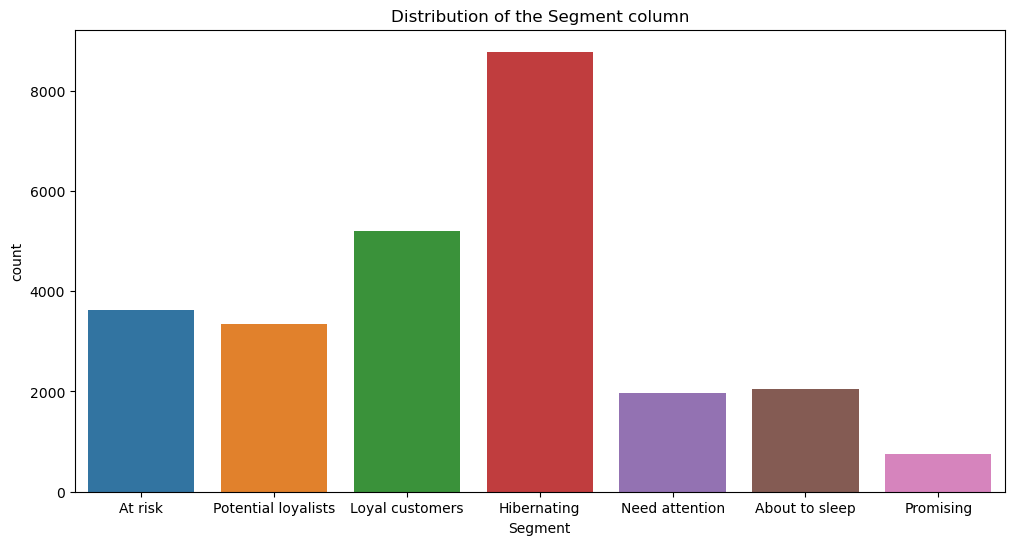

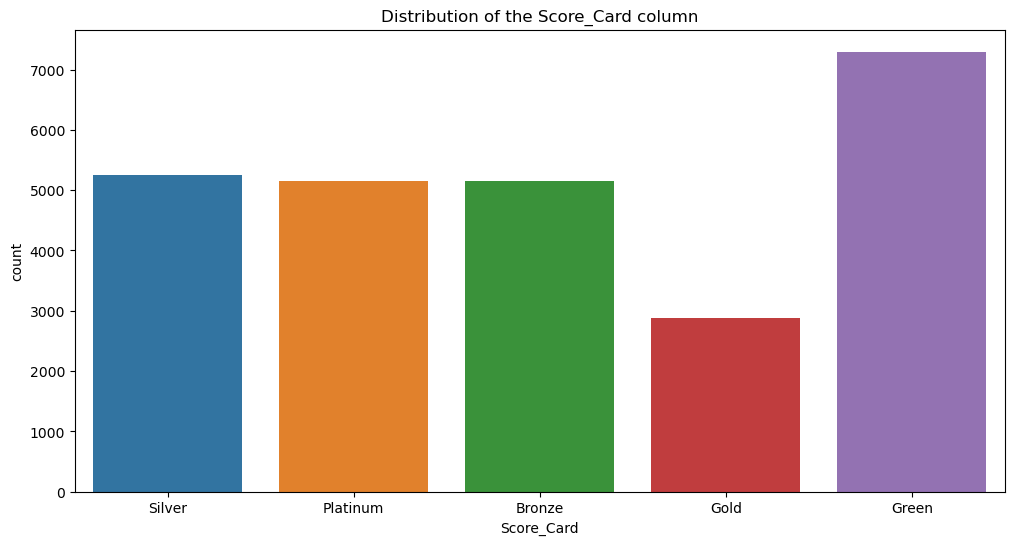

In [171]:
# Plot the distribution of the Segment column
plt.figure(figsize=(12, 6))
sns.countplot(data=RFM_, x='Segment')
plt.title('Distribution of the Segment column')

# Plot the distribution of the Score_Card column
plt.figure(figsize=(12, 6))
sns.countplot(data=RFM_, x='Score_Card')
plt.title('Distribution of the Score_Card column')

In [172]:
# Merge RFM with the RFM_ dataframe without column repetition
RFM_Final = RFM.merge(RFM_, how='inner', on='CUSTOMER_ID')
RFM_Final.head()

,CUSTOMER_ID,Recency_x,Frequency_x,Monetary_x,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,...,Recency_y,Frequency_y,Monetary_y,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Segment,Score_Card
0,AA00312188,24,102,1040.45,8760,1,11,64,10,0.0,...,24,102,1040.45,2,3,4,234,9,At risk,Silver
1,AA00312390,1,58,687.95,2240,1,42,91,3,0.0,...,1,58,687.95,4,2,3,423,9,Potential loyalists,Silver
2,AA00325975,1,205,1386.3,80675,1,11,7,1,0.0,...,1,205,1386.3,4,4,4,444,12,Loyal customers,Platinum
3,AA00336843,14,69,498.1,24255,1,11,6,3,0.0,...,14,69,498.1,2,3,2,232,7,At risk,Bronze
4,AA00339761,23,59,574.8,4030,1,6,7,10,0.0,...,23,59,574.8,2,2,3,223,7,Hibernating,Bronze


In [173]:
# Check the values of the _x and _y columns are the same on each row
RFM_Final['Recency_x'] = RFM_Final['Recency_x'].astype(int)
RFM_Final['Frequency_x'] = RFM_Final['Frequency_x'].astype(int)
RFM_Final['Monetary_x'] = RFM_Final['Monetary_x'].astype(int)

# Drop the _x columns
RFM_Final = RFM_Final.drop(['Recency_y', 'Frequency_y', 'Monetary_y'], axis=1)

# Rename the _y columns
RFM_Final.rename(columns={'Recency_x': 'Recency'}, inplace=True)
RFM_Final.rename(columns={'Frequency_x': 'Frequency'}, inplace=True)
RFM_Final.rename(columns={'Monetary_x': 'Monetary'}, inplace=True)

RFM_Final.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,...,MODE_TRANSACTION_HOUR,MODE_WEEKDAY,LONGEVITY,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Segment,Score_Card
0,AA00312188,24,102,1040,8760,1,11,64,10,0.0,...,14,3,5195,2,3,4,234,9,At risk,Silver
1,AA00312390,1,58,687,2240,1,42,91,3,0.0,...,16,5,4026,4,2,3,423,9,Potential loyalists,Silver
2,AA00325975,1,205,1386,80675,1,11,7,1,0.0,...,11,5,5500,4,4,4,444,12,Loyal customers,Platinum
3,AA00336843,14,69,498,24255,1,11,6,3,0.0,...,13,3,2146,2,3,2,232,7,At risk,Bronze
4,AA00339761,23,59,574,4030,1,6,7,10,0.0,...,17,4,5826,2,2,3,223,7,Hibernating,Bronze


In [174]:
# Create new csv file from RFM_Final
RFM_Final.to_csv('./datasets/1_SEGMENTATION/RFM_Final.csv', index=False)